In [8]:
'''For computing and then plotting Average Causal Effect of the 4 features on the 3 classes'''

'For computing and then plotting Average Causal Effect of the 4 features on the 3 classes'

In [16]:
import torch, torchvision
from torchvision import datasets, transforms
from torch import nn, optim
from torch.nn import functional as F
# !pip install imblearn
import numpy as np
import shap
from model import FraudNet
from load_data import get_dataset, get_dataset_test

import matplotlib.pyplot as plt
import copy

import torch.autograd as autograd
from tqdm import tqdm
# import torch.nn as nn
# import torch.nn.functional as F
# import torch.optim as optim
# import pandas as pd

# import os,csv,math, sys,joblib,copy,pickle
# import matplotlib.pyplot as plt
# import numpy as np
# import sklearn.model_selection, sklearn.preprocessing
# from sklearn.preprocessing import MinMaxScaler
import os
os.environ["CUDA_VISIBLE_DEVICES"]='2'
shap.initjs()

In [17]:
model = FraudNet(5)
print (model)

FraudNet(
  (embedding_layers): ModuleList(
    (0): Embedding(502, 10)
    (1): Embedding(266, 5)
    (2): Embedding(60, 3)
    (3): Embedding(61, 2)
    (4): Embedding(109, 3)
    (5): Embedding(11625, 20)
    (6): Embedding(4, 2)
    (7): Embedding(3, 2)
    (8): Embedding(106, 2)
    (9): Embedding(5, 2)
  )
  (fc1): Linear(in_features=91, out_features=45, bias=True)
  (fc2): Linear(in_features=45, out_features=22, bias=True)
  (fc3): Linear(in_features=22, out_features=11, bias=True)
  (fc4): Linear(in_features=11, out_features=5, bias=True)
  (fc5): Linear(in_features=5, out_features=1, bias=True)
)


In [18]:
# model.load_state_dict(torch.load('continuous_sameWt_eqSample_new_fc_0.3_2_0.333_0.333.th', map_location='cpu'))
# model.load_state_dict(torch.load('best_model/sameWt_eqSample_new_fc_0.3_4_0.201_0.202.th', map_location='cpu'))
model.load_state_dict(torch.load('best_model/smote_sameWt_categorical_fc_0.3_5_0.194_0.194.th'))

<All keys matched successfully>

In [19]:
train_loader, valid_loader, test_loader, data = get_dataset(minibatch_size=64, device='cpu')
X_train, X_val, X_test, Y_train, Y_val, Y_test  = data

background = X_train[np.random.choice(X_train.shape[0], 100, replace=False)]
background_embed = model.embedding_forward(background).detach().float()
X_test_embed = model.embedding_forward(X_test).detach().float()
model.continuous = True

In [20]:
X_values = model.embedding_forward(X_train).detach().float().numpy()

In [21]:
#Calculating covariance and mean of data
cov = np.cov(X_values, rowvar=False)
means = np.mean(X_values, axis=0)

cov=np.array(cov)
mean_vector = np.array(means)

n_classes=1
num_c=X_values.shape[1]#no. of features
num_alpha=100

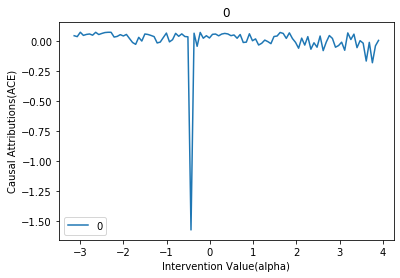

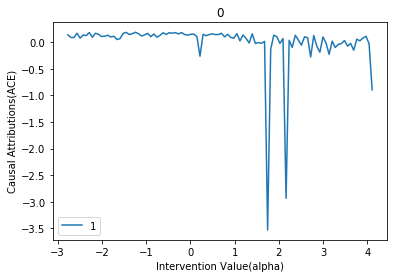

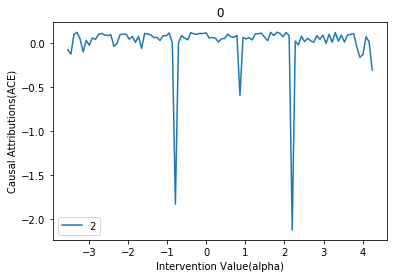

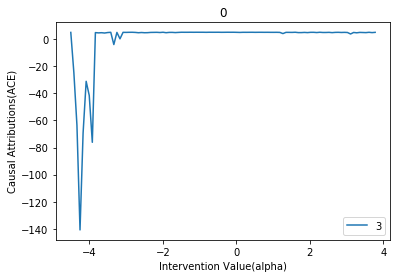

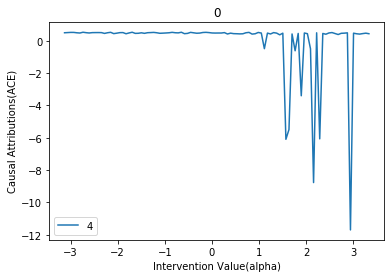

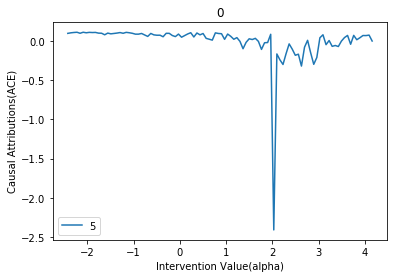

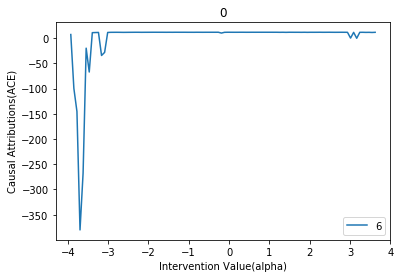

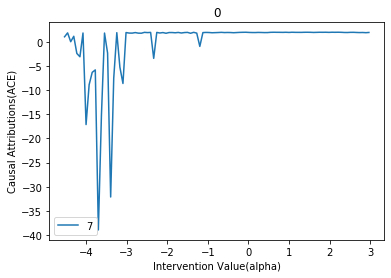

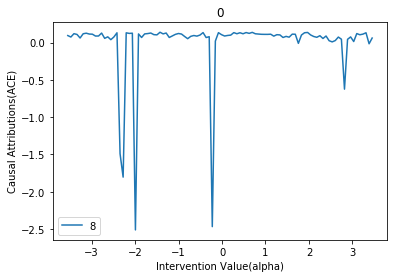

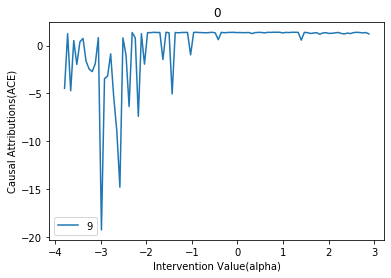

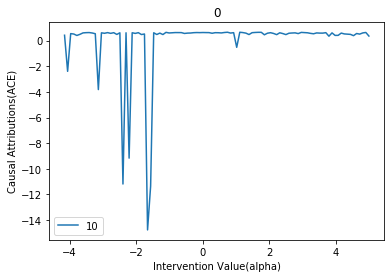

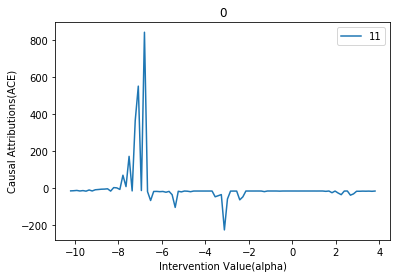

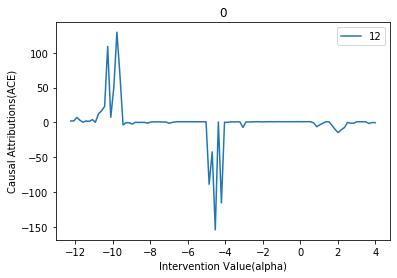

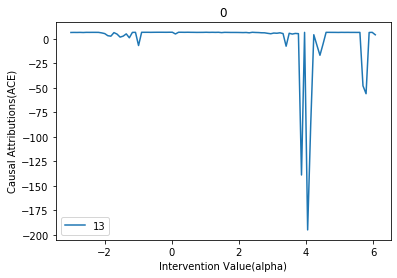

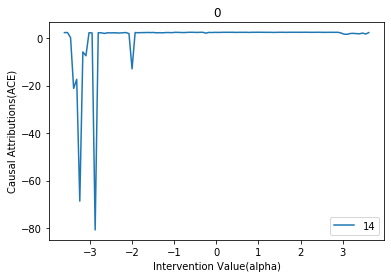

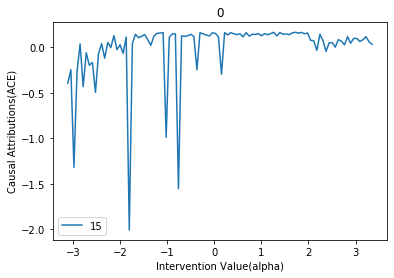

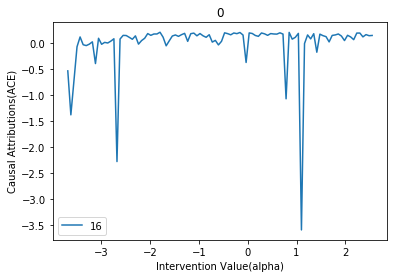

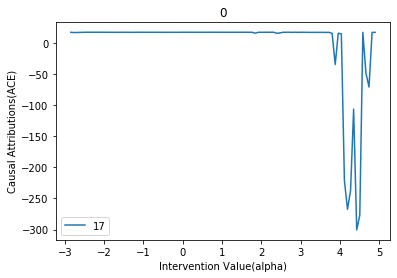

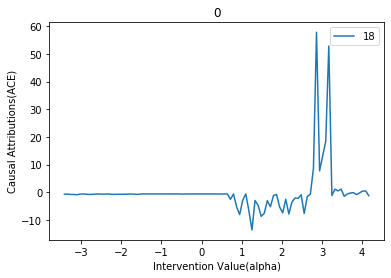

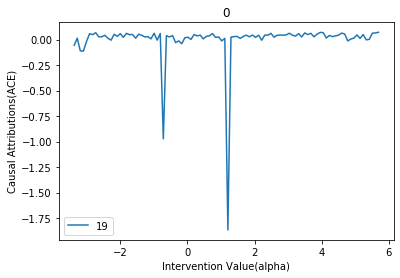

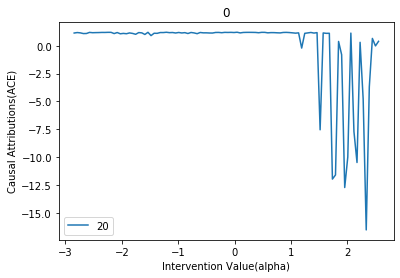

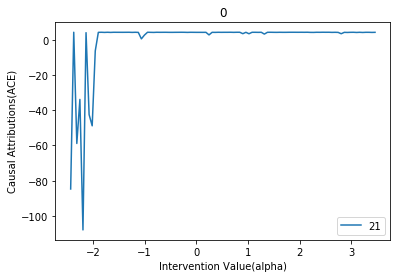

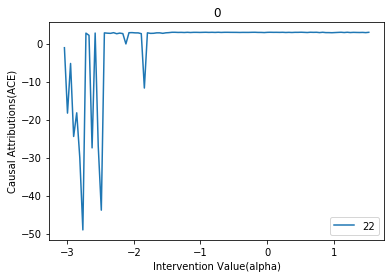

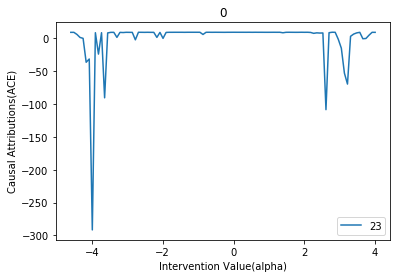

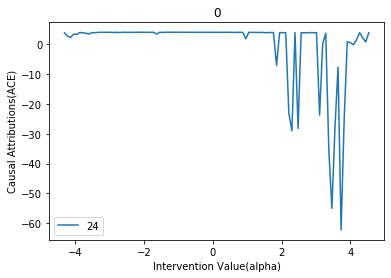

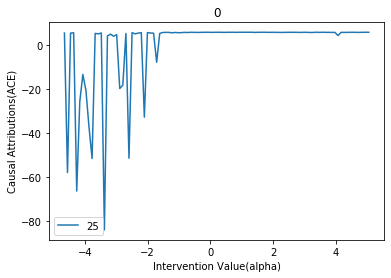

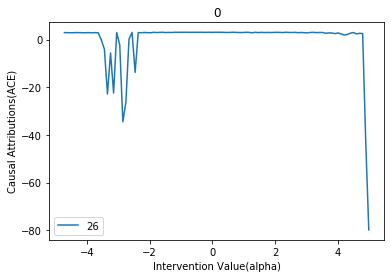

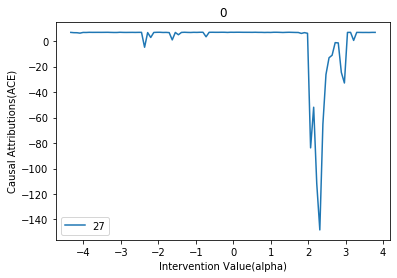

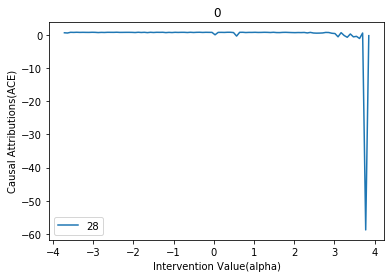

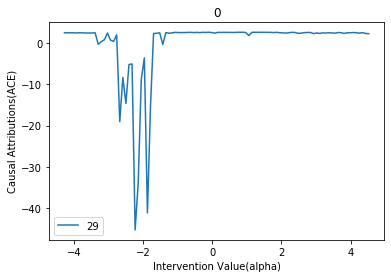

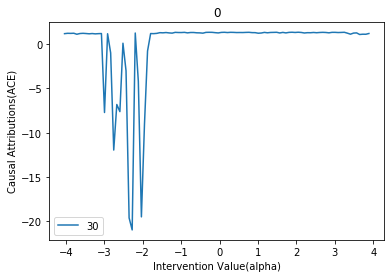

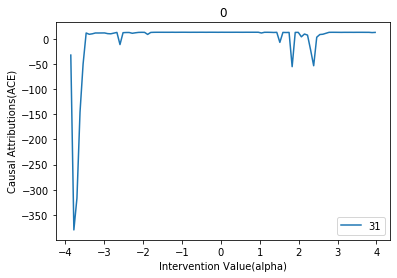

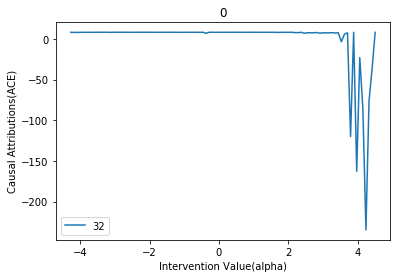

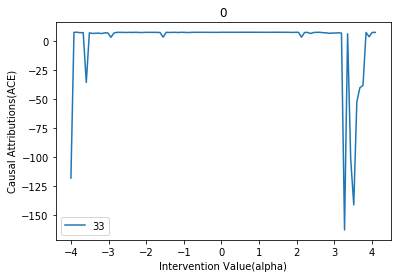

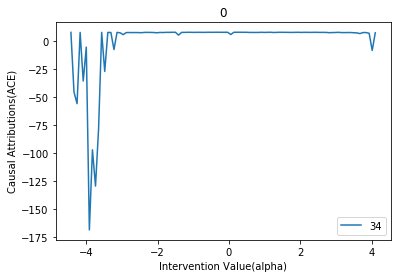

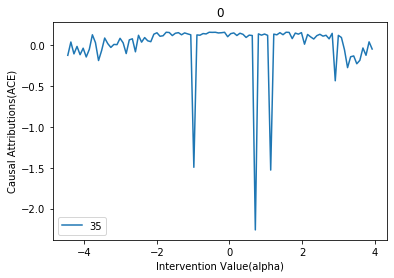

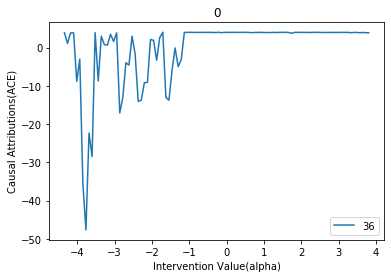

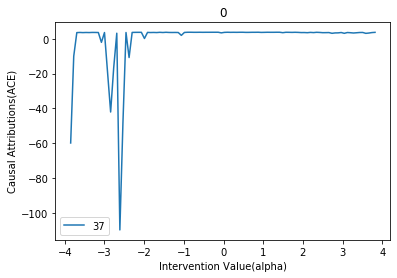

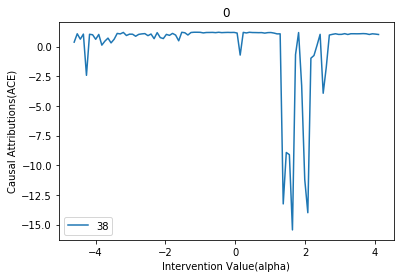

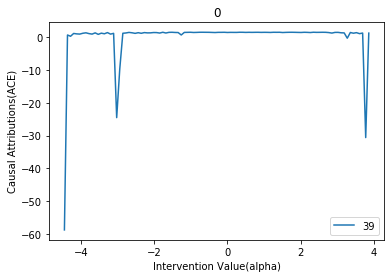

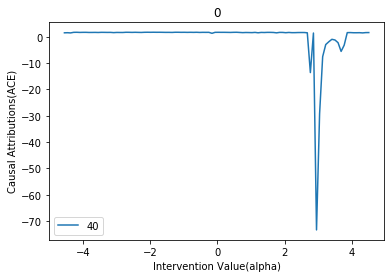

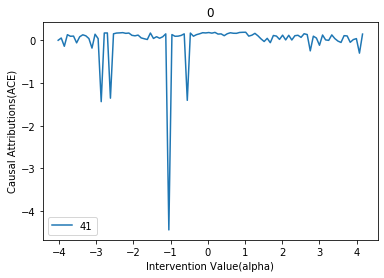

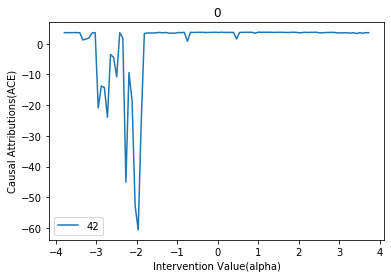

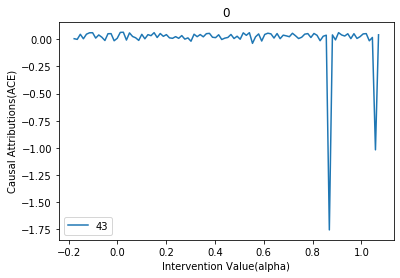

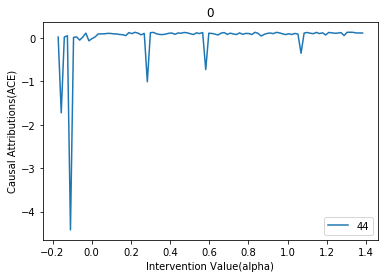

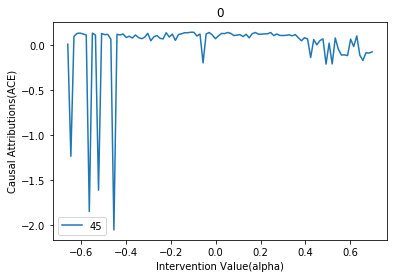

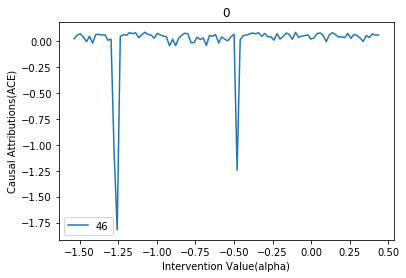

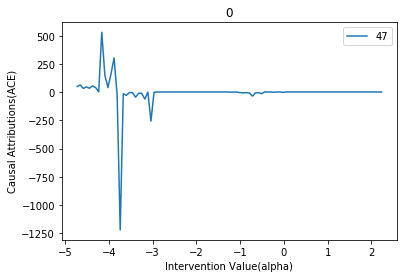

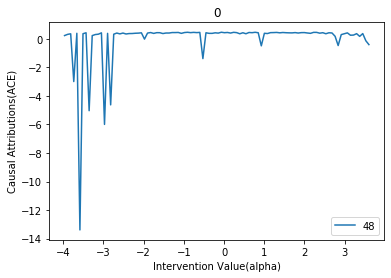

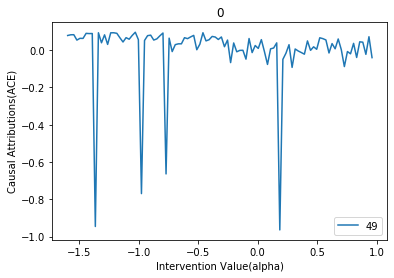

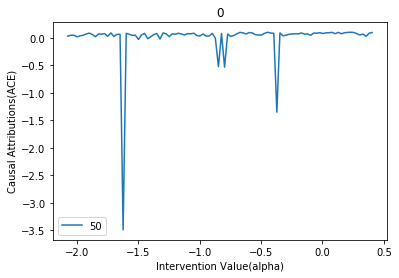

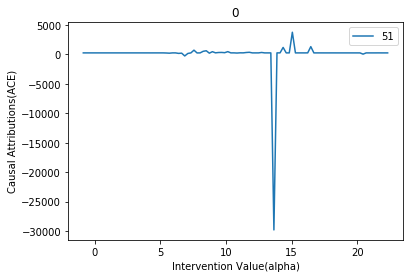

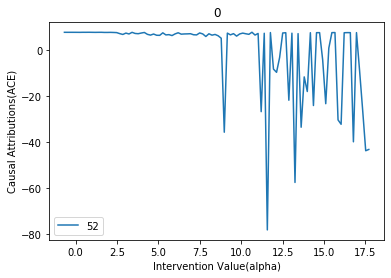

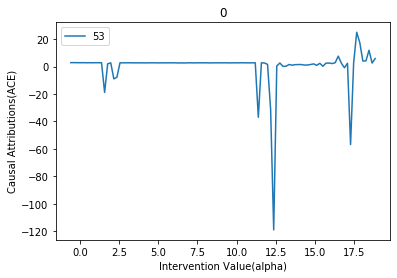

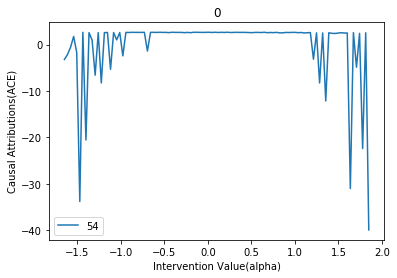

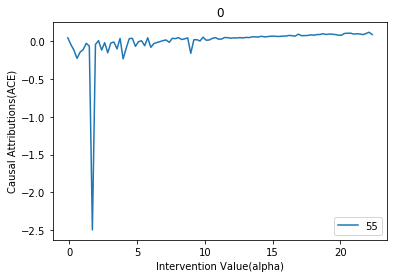

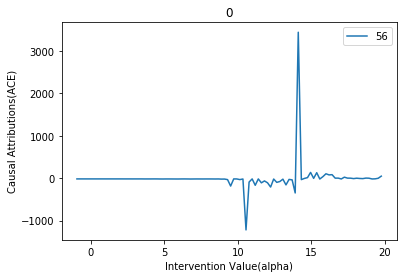

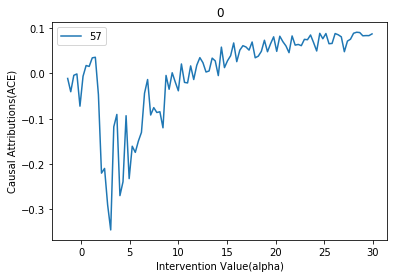

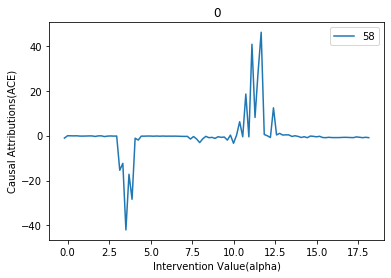

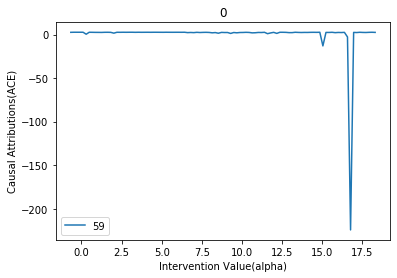

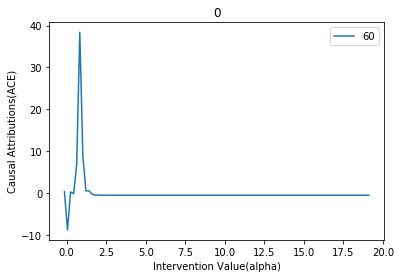

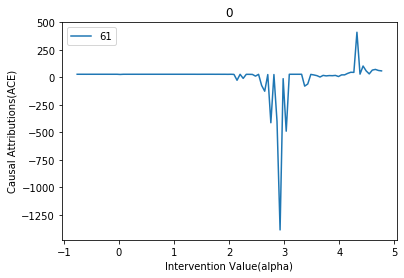

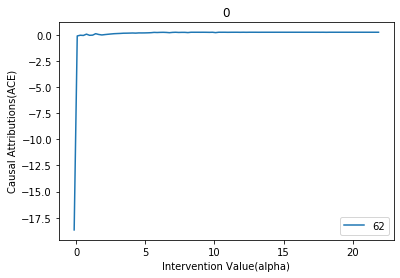

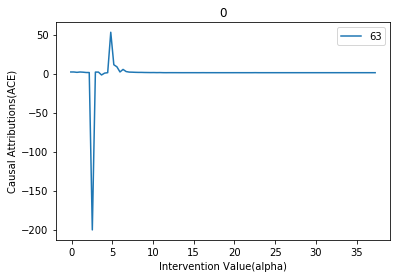

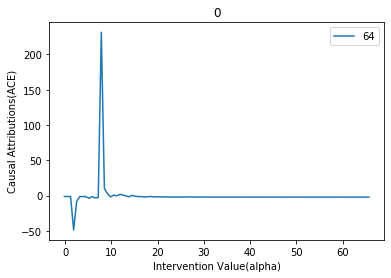

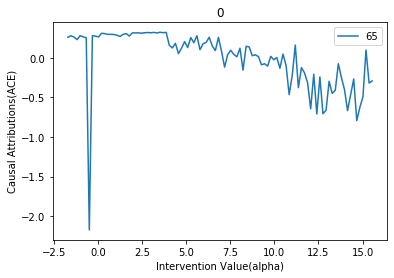

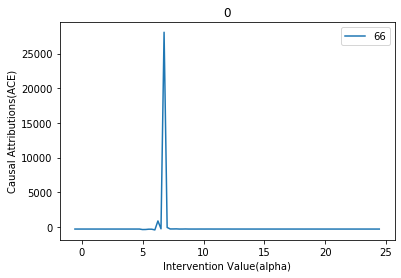

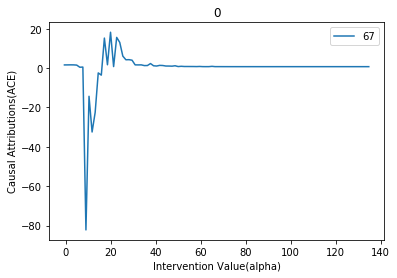

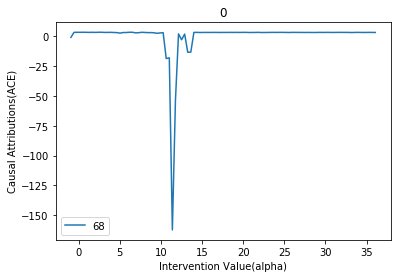

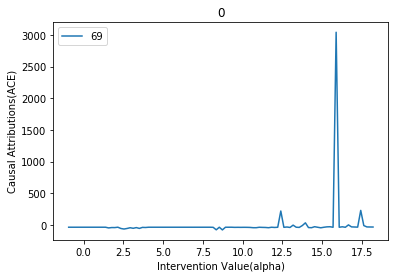

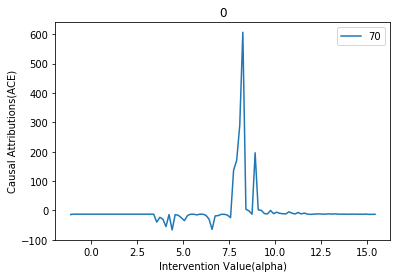

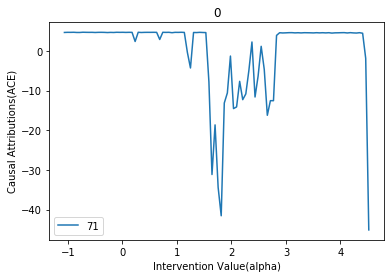

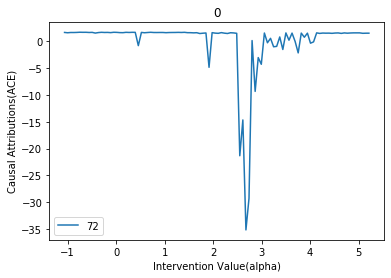

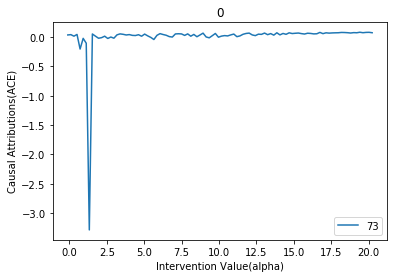

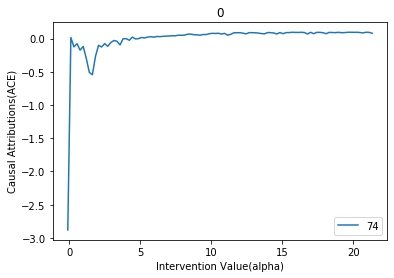

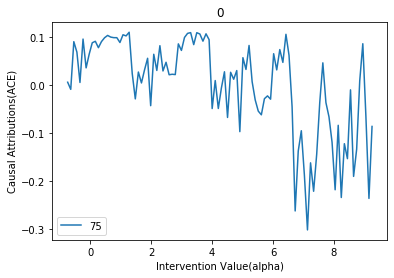

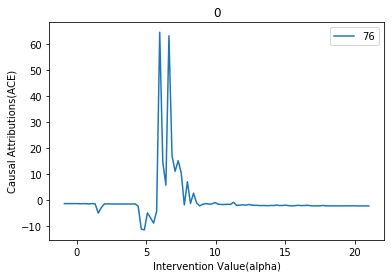

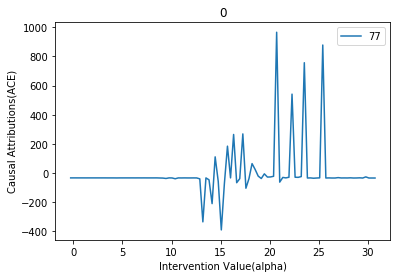

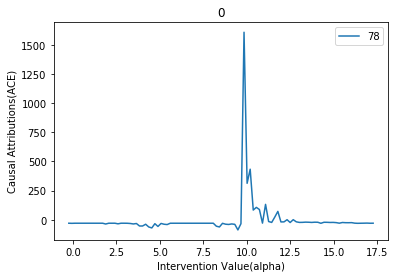

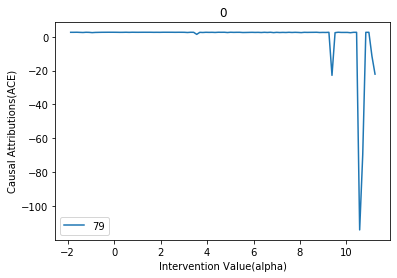

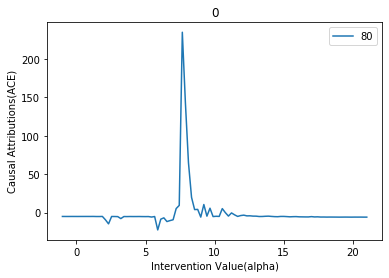

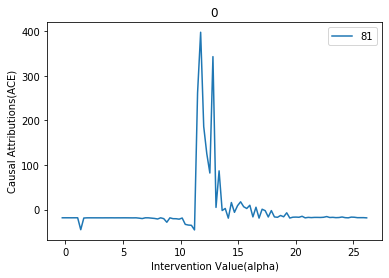

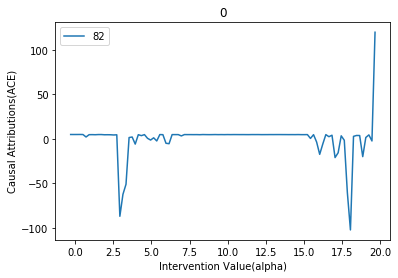

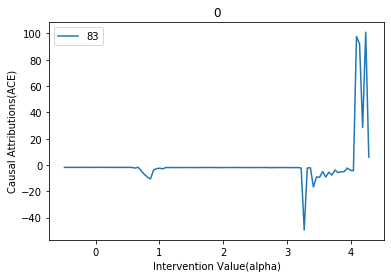

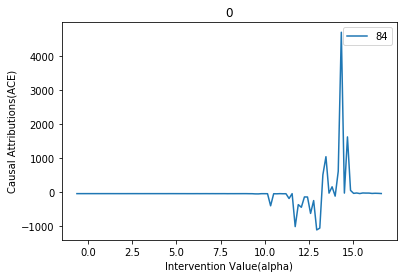

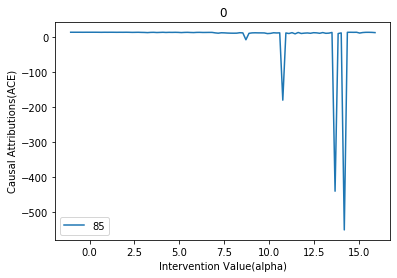

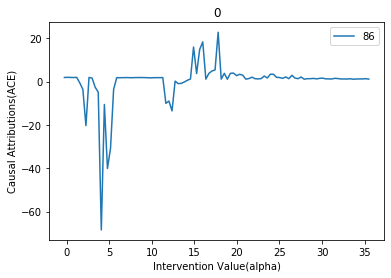

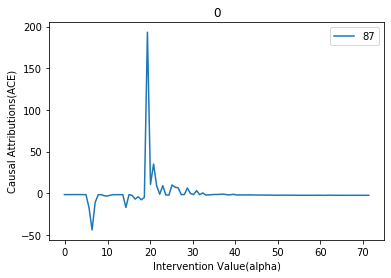

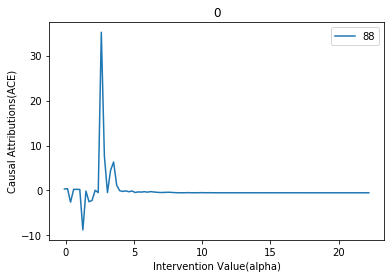

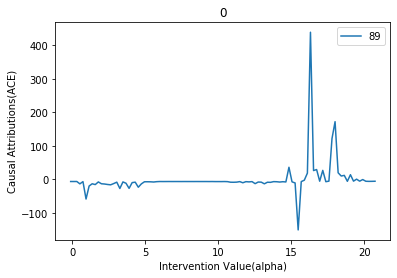

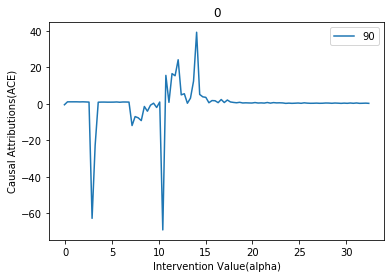

In [23]:
feature_name = dict(list(enumerate(range(num_c))))
col= feature_name
tit=feature_name
mean_baseline = []
ACE_vectors_x = []
ACE_vectors_y = []
for output_index in range(0,n_classcausal_attributesry class
    plt.figure()
    for t in range(0,num_c):#For every feature
        expectation_do_x = []
        inp=copy.deepcopy(mean_vector)
        max_feat = X_values[:, t].max()
        min_feat = X_values[:, t].min()
        for x in np.linspace(min_feat, max_feat, num_alpha):
           
            inp[t] = x
            input_torchvar = autograd.Variable(torch.FloatTensor(inp), requires_grad=True)
            
            output=model.forward(input_torchvar)
            
            o1=output.data.cpu()
            val=o1.numpy()[output_index]#first term in interventional expectation                                       
            
            grad_mask_gradient = torch.zeros(n_classes)
            grad_mask_gradient[output_index] = 1.0
            #calculating the hessian
            first_grads = torch.autograd.grad(output.cpu(), input_torchvar.cpu(), grad_outputs=grad_mask_gradient, retain_graph=True, create_graph=True)

            for dimension in range(0,num_c):#Tr(Hessian*Covariance)
                if dimension == t:
                  continue
                temp_cov = copy.deepcopy(cov)
                temp_cov[dimension][t] = 0.0#row,col in covariance corresponding to the intervened one made 0
                grad_mask_hessian = torch.zeros(num_c)
                grad_mask_hessian[dimension] = 1.0

                #calculating the hessian
                hessian = torch.autograd.grad(first_grads, input_torchvar, grad_outputs=grad_mask_hessian, retain_graph=True, create_graph=False)

                val += np.sum(0.5*hessian[0].data.numpy()*temp_cov[dimension])#adding second term in interventional expectation
            expectation_do_x.append(val)#append interventional expectation for given interventional value
        plt.title(tit[output_index])
        plt.xlabel('Intervention Value(alpha)')
        plt.ylabel('Causal Attributions(ACE)')
        
        #Baseline is np.mean(expectation_do_x)
        plt.plot(np.linspace(min_feat, max_feat, num_alpha), np.array(expectation_do_x) - np.mean(np.array(expectation_do_x)), label = feature_name[t])
        mean_baseline.append(np.mean(np.array(expectation_do_x)))
        ACE_vectors_y.append(np.array(expectation_do_x) - np.mean(np.array(expectation_do_x)))
        ACE_vectors_x.append(np.linspace(min_feat, max_feat, num_alpha))
        plt.legend()
        plt.show()
#         plt.savefig("/gdrive/My Drive/IRIS/Code/"+str(output_index)+".png")


In [7]:
mean_baseline = [0.8663789946448764, 0.4728038432546125, 0.747124797615501, -1.6868419882968098, 0.5966842722473583, 0.8080730180163908, -5.158103885501787, -1.2286669476165135, 0.8331443246465277, -0.2842337066918107, 0.1528831206944833, 6.3678759628242005, -1.3649464042243986, -10.700640406197799, -2.8754981275974147, 0.5724697166656172, 0.7516073000707303, -13.681508153903213, 1.90566424542751, 0.8445117406348444, -0.206808655695339, -0.913502124057108, -2.5572445405967628, -13.994504641789723, -3.2431372916556103, -9.36959960284241, -0.7798584644945268, -3.0916173808029095, 0.717547243036455, -1.6535261946799344, 17.361306750452712, -11.472757768066298, -11.820441244922106, -6.955125181963739, -5.3128808711544755, 0.7715788365177849, -3.191326121939346, -3.7413451850302413, -0.4932480828023397, -3.2849722348366783, -1.0862522294255657, 0.47696288904385037, -4.874681306488627, 0.831581774280952, 0.8338167998597692, 0.829619599724625, 0.7042531037820879, 55.731018385565456, 0.7159662168544775, 0.8477484746391554, 0.731033710103738, 177.13616982510175, -8.852131348793499, -0.8277433678740982, -1.371312102362899, 0.8944924758786718, -1.710791454882062, 0.9035425364164991, 4.133061923461393, -1.2980920327960677, 0.839573671022944, 12.10179813888031, 0.9575688103419959, -1.2890285544039453, 0.42710226732270046, 0.6641927403852605, -7.3185508893495985, -2.1054654609021375, -2.4602041362314253, 2.5938774814597276, 15.19426213705737, -3.156563039459118, -1.9702240448757669, 0.8921599181487225, 0.8849124679625956, 0.8021941861386188, 0.23039444111332938, 36.43251919953522, 290.19666153197073, -1.265877051086877, 11.048913170934982, 79.89044724533788, 19.09878252295116, 2.95871298030806, 14.30772196660469, -13.45311696590525, 3.0311197049284933, 3.019429043139986, 0.483849740228955, 14.777765798143637, 2.221088610929005]

In [26]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

def preprocess(df):
    # x is pandas dataframe
    for i in range(1,11):
        # first 10 categorical variables
        k="C"+str(i)
        df[k].fillna(df[k].mode()[0], inplace=True) # fill with mode
        df[k] = df[k] - df[k].min()
    # fill with median in case of continuous
#     imputer = Imputer(missing_values=np.nan, strategy='median', axis=0)
    for i in range(1,41):
        k="V"+str(i)
        df[k] = pd.to_numeric(df[k], errors='coerce')
        df[k].fillna(df[k].median(), inplace=True)
    return df

test_data = pd.read_csv('./competition-data/competition-data/test.csv')
test_data = test_data.drop(columns='id')

X = preprocess(test_data).values
sc = StandardScaler()

# X = sc.fit_transform(X) # normalize numeric data
X[:, 10:] = sc.fit_transform(X[:, 10:]) # normalize numeric data
X = torch.from_numpy(X).to(device='cpu').float()
# X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=1)
# X_val, X_test, Y_val, Y_test = train_test_split(X_test, Y_test, test_size=0.5, random_state=1)

X_values = model.embedding_forward(torch.Tensor(X)).detach().cpu().float().numpy()

In [27]:
X_values.shape

(14516, 91)

In [33]:
from scipy import interpolate
causal_attributes = []
for t in range(num_c):
    f = interpolate.interp1d(ACE_vectors_x[t], ACE_vectors_y[t], fill_value="extrapolate")
    new_feat = f(X_values[:, t])
    causal_attributes.append(new_feat)
causal_attributes = np.stack(causal_attributes, axis=1)
causal_attributes.shape

(14516, 91)

In [34]:
embeddingIdx = np.cumsum(model.embedding_output_sizes)
embeddingIdx = np.hstack((0, embeddingIdx))

def merge_categorical(shap_values):
    final_shap = []
    for i in range(len(embeddingIdx)-1):
        shapval = np.sum(shap_values[:, embeddingIdx[i]:embeddingIdx[i+1]], axis=1)[:, None]
        final_shap.append(shapval)
    final_shap.append(shap_values[:, embeddingIdx[-1]:])
    # for i in final_shap:
    #     print(i.shape)
    final_shap = np.concatenate(final_shap, axis=1)
    return final_shap
causal_attributes = merge_categorical(causal_attributes)

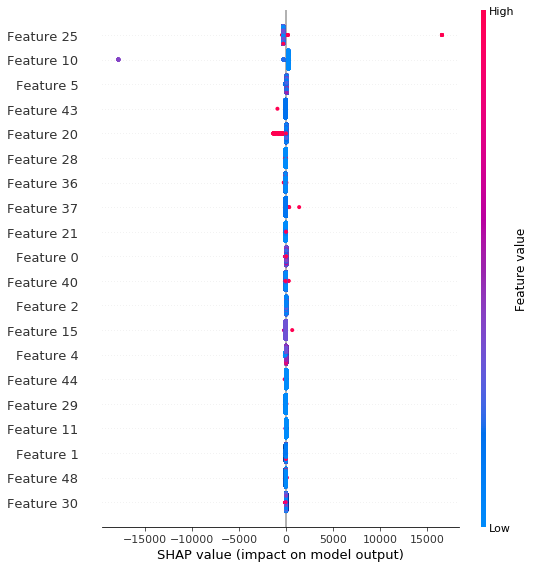

In [37]:
shap.summary_plot(causal_attributes, X)

In [13]:
feature_name = dict(list(enumerate(range(num_c))))
col= feature_name
tit=feature_name
output_index = 0
causal_attributes = []
for idx in tqdm(range(0,X_values.shape[0])):#For every class
    expectation_do_x = []
    for t in range(0,num_c):#For every feature
        inp=copy.deepcopy(mean_vector)
        
        x = X_values[idx, t]
        
        ### value compuation starts here
           
        inp[t] = x
        input_torchvar = autograd.Variable(torch.FloatTensor(inp), requires_grad=True).to(device='cuda')

        output=model.forward(input_torchvar)

        o1=output.data.cpu()
        val=o1.numpy()[output_index]#first term in interventional expectation                                       

        grad_mask_gradient = torch.zeros(n_classes)
        grad_mask_gradient[output_index] = 1.0
        #calculating the hessian
        first_grads = torch.autograd.grad(output.cuda(), input_torchvar.cuda(), grad_outputs=grad_mask_gradient.cuda(), retain_graph=True, create_graph=True)

        for dimension in range(0,num_c):#Tr(Hessian*Covariance)
            if dimension == t:
              continue
            temp_cov = copy.deepcopy(cov)
            temp_cov[dimension][t] = 0.0#row,col in covariance corresponding to the intervened one made 0
            grad_mask_hessian = torch.zeros(num_c)
            grad_mask_hessian[dimension] = 1.0

            #calculating the hessian
            hessian = torch.autograd.grad(first_grads, input_torchvar, grad_outputs=grad_mask_hessian.cuda(), retain_graph=True, create_graph=False)
#             hessian = np.asarray(hessian[0].cpu())#.detach().cpu().numpy()
            val += np.sum(0.5*hessian[0].data.cpu().numpy()*temp_cov[dimension])#adding second term in interventional expectation
            # 
            expectation_do_x.append(val - mean_baseline[t])#append interventional expectation for given interventional value
        causal_attributes.append(expectation_do_x)

  0%|          | 3/14516 [00:24<33:27:43,  8.30s/it]

KeyboardInterrupt: 